### HEART DISEASE PREDICTION PROJECT 
Predicting the likelihood that the patient will have the Heart Disease

### Project Overview
Heart disease also known as Cardiovascular disease encompasses a wide range of conditions affecting the heart and blood vessels. The primary objective of this project is to identify a patient at risk aiming for early detection, improved patient outcomes and reduce the severity of heart disease and allocate resources effectively focusing on high risk patients. The capstone project will use supervised machine learning techniniques to classify patients as having or not having the heart disease. The model will leverage data from the "heart_disease.csv" dataset, which includes demographic information, clinical measurements, and historical health data.

### Business Understanding/Problem statement
Heart disease is a leading cause of death globally and early detection and intervention are essential for reducing mortality rates. Prediction of heart disease is a critical challenge in the area of clinical data analysis. Despite growing awareness, early detection and risk assessment remain challenging due to limited local research and data-driven insights. This study aims to analyze key health indicators. By identifying major risk factors and trends, this research seeks to support healthcare professionals, policymakers, and researchers in developing targeted interventions, improving early diagnosis, and enhancing public health strategies to combat heart disease in Kenya.

### Objectives
1. To develop a predictive model by creating machine learning model capable of accurately predicting the likelihood of heart diseas
2. Identify idividuals at high risk of developing the heart disease
3. To reduce the number of heart disease related deaths
4.  To contribute to Public Health efforts by identifying high risk populations and informing policy decisions


### Data understanding
Dataset: The project utilizes grom Kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease) with 10,000 rows    and 21 Columns






In [62]:
# Importing relevant libraries
import pandas as pd

In [63]:
# Load the dataset
data = pd.read_csv(r"C:\Users\abn\OneDrive\Desktop\Phase 5 project\Group-10-Heart-disease-project\Data\heart_disease.csv")

In [64]:
# Check the first few rows of the dataset
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


#### Data structure

In [65]:
# Get the basic info about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [66]:
# Check for any missing values
data.isnull().sum()


Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

#### Column Description
1. Gender: The individual's gender (Male or Female).
2. Blood Pressure: The individual's blood pressure (systolic).
3. Cholesterol Level: The individual's total cholesterol level.
4. Exercise Habits: The individual's exercise habits (Low, Medium, High).
5. Smoking: Whether the individual smokes or not (Yes or No).
6. Family Heart Disease: Whether there is a family history of heart disease (Yes or No).
7. Diabetes: Whether the individual has diabetes (Yes or No).
8. BMI: The individual's body mass index.High Blood Pressure: Whether the individual has high blood pressure (Yes or No).
9. Low HDL Cholesterol: Whether the individual has low HDL cholesterol (Yes or No).
10. High LDL Cholesterol: Whether the individual has high LDL cholesterol (Yes or No).
11. Alcohol Consumption: The individual's alcohol consumption level (None, Low, Medium, High).
12. Stress Level: The individual's stress level (Low, Medium, High).
13. Sleep Hours: The number of hours the individual sleeps.
14. Sugar Consumption: The individual's sugar consumption level (Low, Medium, High).
15. TriglyAge: The individual's age.
16. ceride Level: The individual's triglyceride level.
17. Fasting Blood Sugar: The individual's fasting blood sugar level.
18. CRP Level: The C-reactive protein level (a marker of inflammation).
19. Homocysteine Level: The individual's homocysteine level (an amino acid that affects blood vessel health).
20. Heart Disease Status: The individual's heart disease status (Yes or No).

In [67]:
# Get summary statistics
data.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


#### Data cleaning

In [68]:
# Drop rows with missing values 
data = data.dropna() 
data 

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [69]:
# Remove duplicates
data = data.drop_duplicates()
data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


<AxesSubplot:>

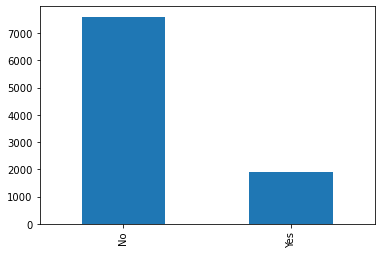

In [70]:
# The target variable indicates whether or not a patient has heart disease. 
# Check the distribution of the target variable
data['Heart Disease Status'].value_counts().plot(kind='bar')


In [71]:
# Convert categorical features into numerical features

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,0,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,1,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,0,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,1,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,1,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,1,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,1,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,1,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


#### Visualization

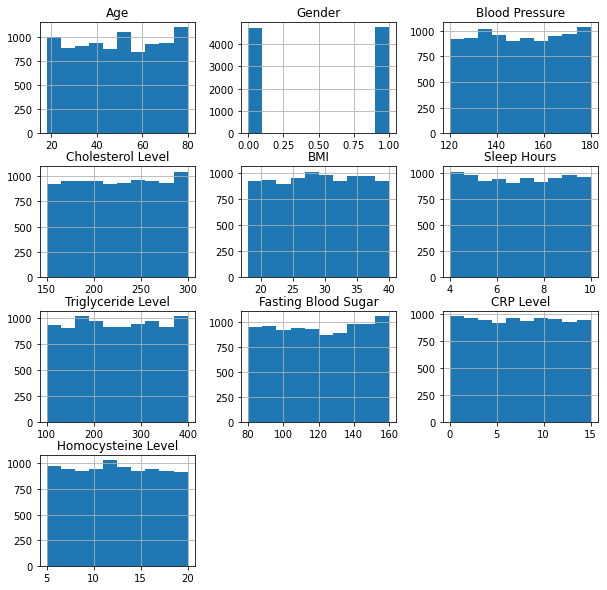

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
data.hist(figsize=(10, 10))
plt.show()

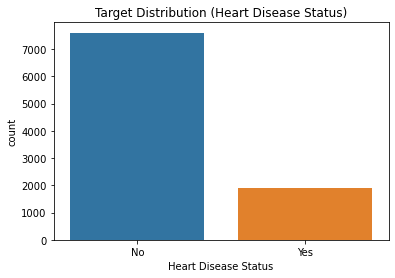

In [73]:
# Count plot for categorical features
sns.countplot(x='Heart Disease Status', data=data)
plt.title("Target Distribution (Heart Disease Status)")
plt.show()

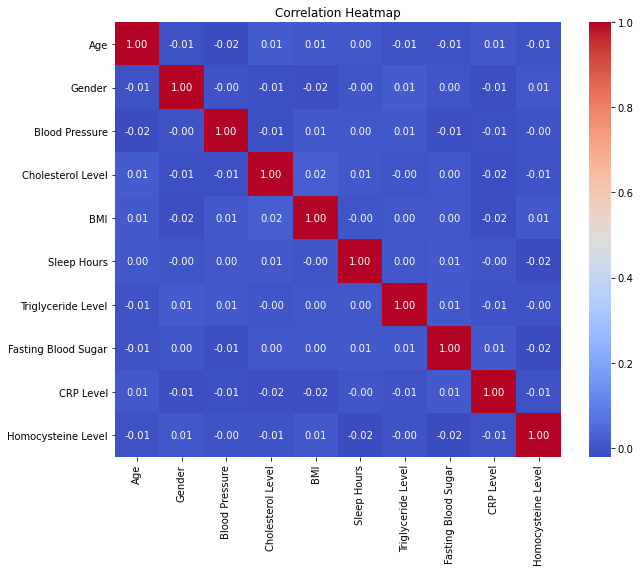

In [74]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

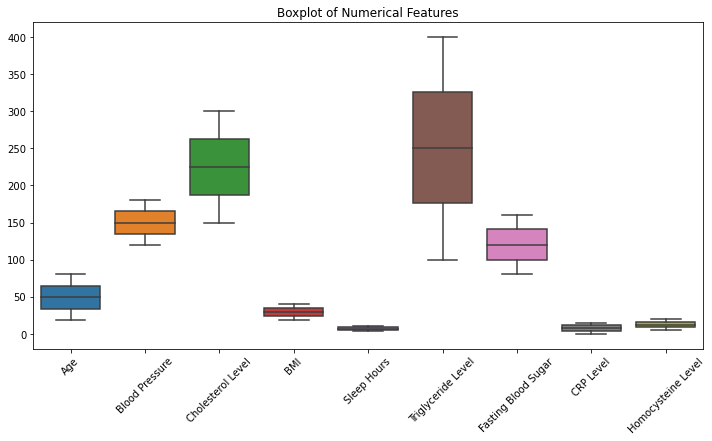

In [75]:
# Boxplot for numerical features to check for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [76]:
#  correlation matrix to see the relationships between numerical features
corr = data.corr()
corr


,Age,Gender,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
Age,1.000000,-0.006709,-0.019232,0.014005,0.013485,0.003867,-0.005650,-0.005398,0.005901,-0.008067
Gender,-0.006709,1.000000,-0.003975,-0.011141,-0.017923,-0.000816,0.014040,0.000677,-0.014358,0.005136
Blood Pressure,-0.019232,-0.003975,1.000000,-0.011642,0.008053,0.003244,0.007345,-0.014297,-0.010653,-0.002304
Cholesterol Level,0.014005,-0.011141,-0.011642,1.000000,0.021694,0.008189,-0.000501,0.002146,-0.017254,-0.005401
BMI,0.013485,-0.017923,0.008053,0.021694,1.000000,-0.001902,0.003180,0.004913,-0.016437,0.007756
Sleep Hours,0.003867,-0.000816,0.003244,0.008189,-0.001902,1.000000,0.004095,0.011910,-0.001473,-0.022194
Triglyceride Level,-0.005650,0.014040,0.007345,-0.000501,0.003180,0.004095,1.000000,0.008447,-0.005950,-0.003987
Fasting Blood Sugar,-0.005398,0.000677,-0.014297,0.002146,0.004913,0.011910,0.008447,1.000000,0.013487,-0.019272
CRP Level,0.005901,-0.014358,-0.010653,-0.017254,-0.016437,-0.001473,-0.005950,0.013487,1.000000,-0.008084
Homocysteine Level,-0.008067,0.005136,-0.002304,-0.005401,0.007756,-0.022194,-0.003987,-0.019272,-0.008084,1.000000


In [77]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

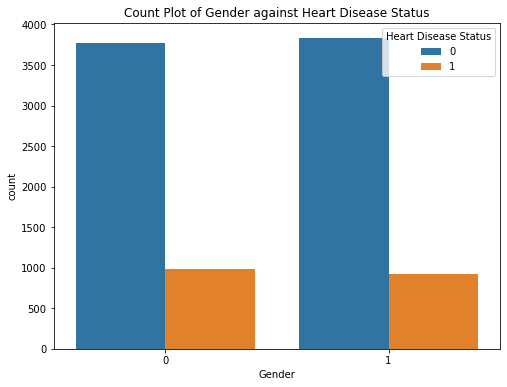

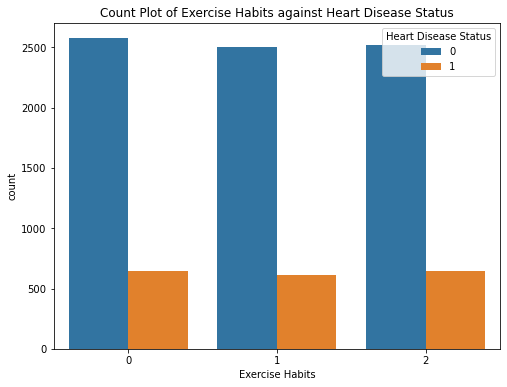

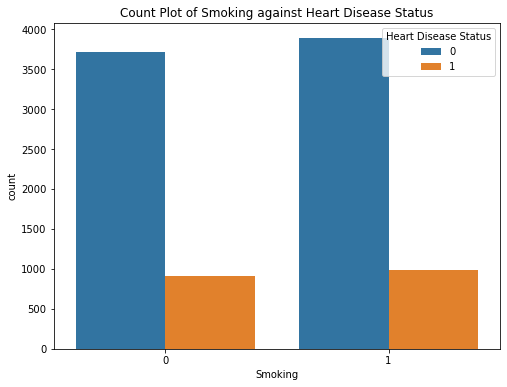

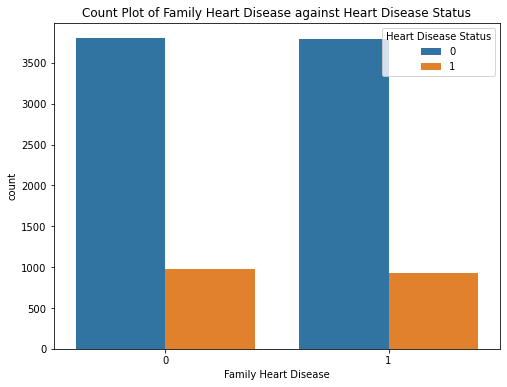

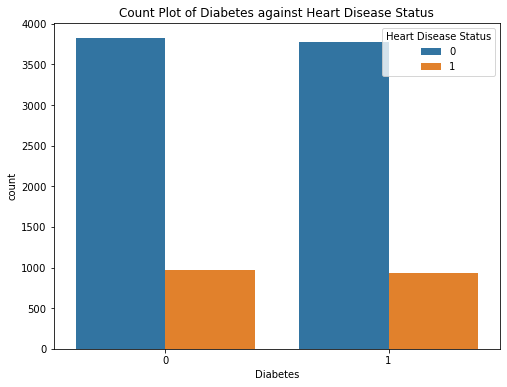

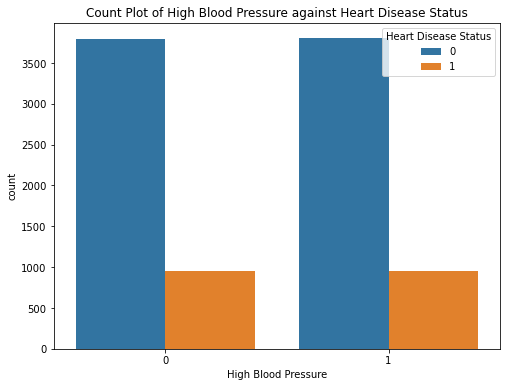

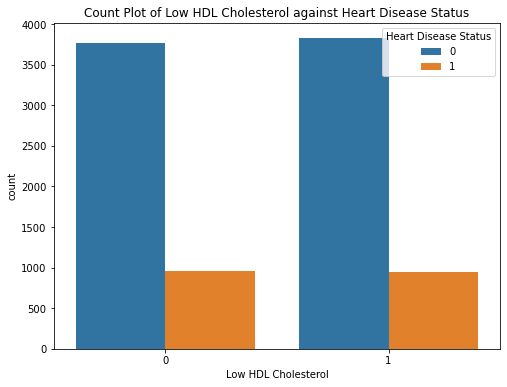

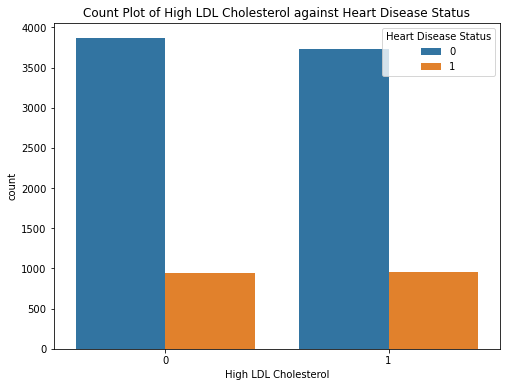

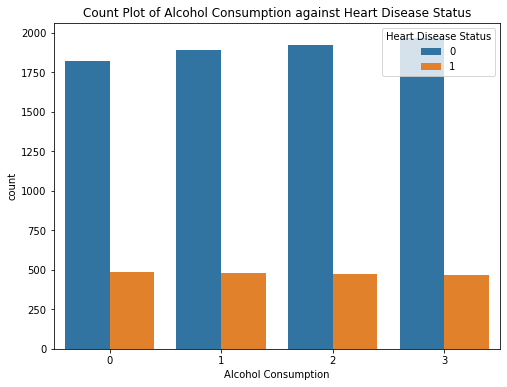

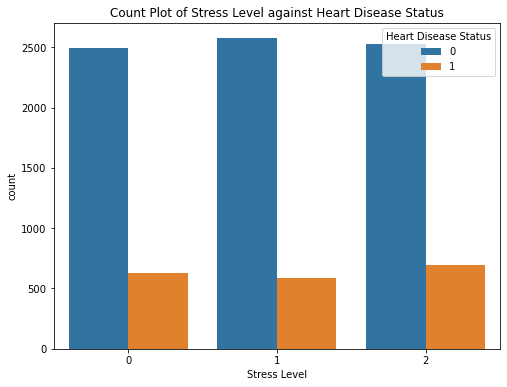

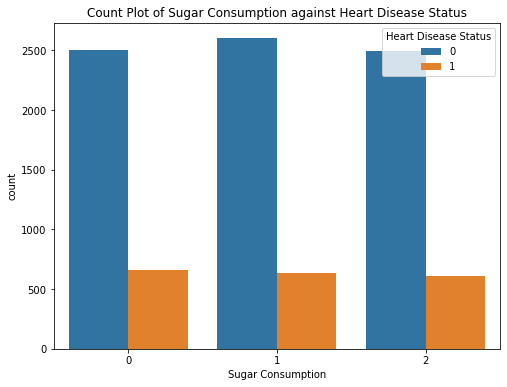

In [78]:
# List of categorical features in the dataset (adjust based on the actual dataset)
categorical_features = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']

# Loop through categorical features and plot count plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Heart Disease Status', data=data)
    plt.title(f'Count Plot of {feature} against Heart Disease Status')
    plt.show()

#### Data Modelling

In [86]:
## split your data into training and testing sets, and normalize or standardize features if necessary.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split data into features and target
X = data.drop('Heart Disease Status', axis=1)
y = data['Heart Disease Status']

# Handling Imbalance using SMOTE and to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model selection and Training
#### 1. Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
# ROC-AUC Score (for a more comprehensive evaluation)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.7131
Confusion Matrix:
[[1084  448]
 [ 424 1083]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1532
           1       0.71      0.72      0.71      1507

    accuracy                           0.71      3039
   macro avg       0.71      0.71      0.71      3039
weighted avg       0.71      0.71      0.71      3039

ROC AUC Score: 0.78


c:\Users\abn\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2. Random Forest and evaluate it using accuracy and AUC-ROC:

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("AUC-ROC: {roc_auc}")
print(f"AUC-ROC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.799276077657124
AUC-ROC: {roc_auc}
AUC-ROC: 0.8700606915335051
Confusion Matrix:
[[1318  214]
 [ 396 1111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1532
           1       0.71      0.72      0.71      1507

    accuracy                           0.71      3039
   macro avg       0.71      0.71      0.71      3039
weighted avg       0.71      0.71      0.71      3039



#### 3. Support Vector Machine (SVM)

In [90]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train an SVM model with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))  # For linear SVM, use decision_function
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.7666995722277065

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1532
           1       0.80      0.71      0.75      1507

    accuracy                           0.77      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.77      0.77      0.77      3039


Confusion Matrix:
[[1258  274]
 [ 435 1072]]
ROC AUC Score: 0.84


### Advanced Machine Learning (Hyperparameter Tuning)

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5)
# Fit the grid search
grid_search.fit(X_train, y_train)

# Use the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# predictions
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the tuned model
# 1. **Accuracy**: Percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 2. **Classification Report**: Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. **ROC-AUC Score**: Measures model's ability to distinguish between classes
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1532
           1       0.84      0.74      0.79      1507

    accuracy                           0.80      3039
   macro avg       0.80      0.80      0.80      3039
weighted avg       0.80      0.80      0.80      3039

ROC AUC Score: 0.87


### EVALUATION
1. Accuracy (0.80 or 80%):
The accuracy of 80% indicates that the model is correctly predicting heart disease status for 80% of the cases. 

2. Classification Report:
    Class 0 (No Heart Disease):
    Precision: 0.77 — The model predicted no heart disease (class 0), it was correct 77% of the time.
    Recall: 0.86 — The model correctly identified 86% of the true no-heart-disease instances.
    F1-Score: 0.81 — The harmonic mean of precision and recall for class 0 is 81%.

    Class 1 (Heart Disease):
    Precision: 0.84 — The model predicted heart disease (class 1), it was correct 84% of the time.
    Recall: 0.74 — The model correctly identified 74% of the true heart disease instances.
    F1-Score: 0.79 — The harmonic mean of precision and recall for class 1 is 79%.

3. ROC AUC Score: 0.87:
This score indicates that the model has a good ability to differentiate between the two classes (no heart disease vs. heart disease).




#### 1. Logistic regression, Random Forest Classifier ans Support Vector Machine were the models used to predict the presence of heart disease in patients. All the models recorded Accuracy of 80% and SVM of 0.5% indicating the model is more of random sampling
#### 2.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced')

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5171929824561403

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.52      0.63      2289
           1       0.20      0.50      0.29       561

    accuracy                           0.52      2850
   macro avg       0.51      0.51      0.46      2850
weighted avg       0.69      0.52      0.57      2850


Confusion Matrix:
 [[1196 1093]
 [ 283  278]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize SVM with balanced class weights
model = SVC(class_weight='balanced', random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70      2289
           1       0.19      0.35      0.24       561

    accuracy                           0.57      2850
   macro avg       0.49      0.49      0.47      2850
weighted avg       0.68      0.57      0.61      2850


Confusion Matrix:
 [[1417  872]
 [ 363  198]]


In [ ]:
# Fit grid search
grid_search.fit(X_train_smote, y_train_smote)